<a href="https://colab.research.google.com/github/Manavjha20/Exploratory-Data-Analysis/blob/main/placement_project_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('/content/placement.csv')

# Steps which we are doing here

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output columns
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate he model/ model selection
# 6. Deploy the model

In [62]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [64]:
df.shape

(100, 4)

In [65]:
df = df.iloc[:,1:]

In [66]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


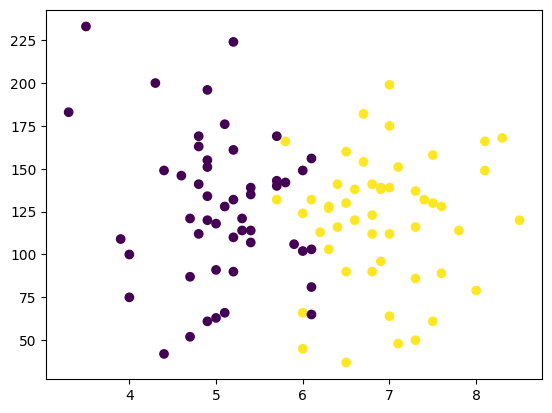

In [67]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [68]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [69]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [70]:
y.shape

(100,)

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [72]:
X_train

,cgpa,iq
47,5.2,161.0
26,7.0,199.0
48,6.6,138.0
49,5.4,135.0
9,5.1,66.0
...,...,...
78,6.1,81.0
45,6.0,66.0
46,5.3,114.0
62,6.0,102.0


In [73]:
y_train

,placement
47,0
26,1
48,1
49,0
9,0
...,...
78,0
45,1
46,0
62,0


In [74]:
X_test

,cgpa,iq
4,5.8,142.0
13,6.4,116.0
33,6.0,149.0
53,8.3,168.0
79,6.5,90.0
6,5.7,143.0
77,7.3,50.0
80,4.9,196.0
70,6.3,127.0
19,5.2,132.0


In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
X_train = scaler.fit_transform(X_train)

In [78]:
X_train

array([[-0.66131686,  0.96152913],
       [ 0.89812027,  1.91608054],
       [ 0.55157869,  0.38377433],
       [-0.48804606,  0.308415  ],
       [-0.74795225, -1.42484941],
       [ 0.98475567, -1.87700534],
       [-2.30738938,  1.51416416],
       [-0.05486908, -0.42005844],
       [-0.66131686, -0.82197483],
       [ 0.46494329,  0.93640936],
       [-0.48804606, -0.39493867],
       [ 1.33129725, -1.55044828],
       [ 0.81148487, -0.67125618],
       [-2.13411858,  2.77015286],
       [ 1.15802646, -0.1688607 ],
       [ 1.33129725,  0.18281613],
       [-1.00785844,  1.01176868],
       [-1.00785844,  0.45913365],
       [ 1.85110962,  0.66009184],
       [-1.00785844, -0.2693398 ],
       [ 0.89812027, -1.47508896],
       [-0.22813988,  0.43401387],
       [ 0.72484948, -0.82197483],
       [ 0.11840171,  0.23305568],
       [ 0.3783079 ,  0.45913365],
       [ 1.15802646,  0.35865455],
       [ 0.2916725 ,  0.13257659],
       [ 2.19765121, -0.06838161],
       [-1.44103542,

In [79]:
X_test = scaler.transform(X_test)

In [80]:
X_test

array([[-0.14150448,  0.48425342],
       [ 0.3783079 , -0.1688607 ],
       [ 0.03176631,  0.66009184],
       [ 2.02438042,  1.13736755],
       [ 0.46494329, -0.82197483],
       [-0.22813988,  0.5093732 ],
       [ 1.15802646, -1.82676579],
       [-0.92122304,  1.84072122],
       [ 0.2916725 ,  0.10745681],
       [-0.66131686,  0.23305568]])

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
clf = LogisticRegression()

In [83]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [84]:
y_pred = clf.predict(X_test)

In [85]:
y_test

,placement
4,0
13,1
33,0
53,1
79,1
6,0
77,1
80,0
70,1
19,0


In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_test,y_pred)

0.9

In [88]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

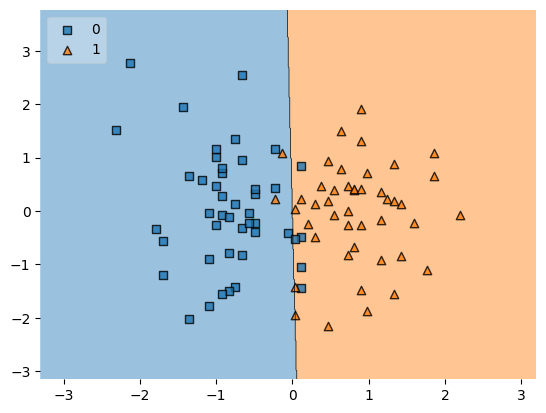

In [89]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)